In [6]:
# Feature Engineering Tutorial
# We'll use the Titanic dataset because it has:
# - numeric features
# - categorical features
# - missing values
# - good variety for transformations

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# First 5 rows
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Select a few meaningful columns
# (some columns like Ticket, Cabin are messy and need extra cleaning)
df = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

# See summary
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [8]:
# Fill missing numeric values with median (robust to outliers)
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing categorical values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


C:\Users\tanma\AppData\Local\Temp\ipykernel_25200\950977291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].fillna(df['Age'].median())
C:\Users\tanma\AppData\Local\Temp\ipykernel_25200\950977291.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [9]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Show encoded DataFrame
df_encoded.head()


,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,True,False,True
1,1,1,38.0,71.2833,False,False,False
2,1,3,26.0,7.9250,False,False,True
3,1,1,35.0,53.1000,False,False,True
4,0,3,35.0,8.0500,True,False,True


In [10]:
df_encoded['FamilySize'] = data['SibSp'] + data['Parch'] + 1



In [11]:
df_encoded['IsChild'] = (df['Age'] < 16).astype(int)


In [12]:
df_encoded['FarePerPerson'] = df['Fare'] / df_encoded['FamilySize']


In [13]:
df_encoded['Age*Class'] = df['Age'] * df['Pclass']


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['Age', 'Fare', 'FamilySize', 'FarePerPerson', 'Age*Class']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded.head()


,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsChild,FarePerPerson,Age*Class
0,0,3,-0.565736,-0.502445,True,False,True,0.059160,0,-0.454798,0.058824
1,1,1,0.663861,0.786845,False,False,False,0.059160,0,0.438994,-0.803342
2,1,3,-0.258337,-0.488854,False,False,True,-0.560975,0,-0.334757,0.428324
3,1,1,0.433312,0.420730,False,False,True,0.059160,0,0.185187,-0.895717
4,0,3,0.433312,-0.486337,True,False,True,-0.560975,0,-0.331267,1.259699


In [15]:
X = df_encoded.drop('Survived', axis=1)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8268156424581006

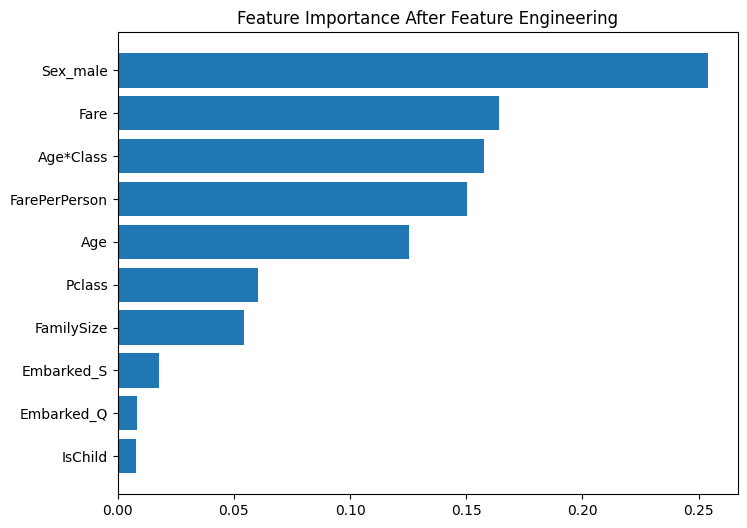

In [17]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(X.columns[indices], importances[indices])
plt.title("Feature Importance After Feature Engineering")
plt.show()


In [ ]:
# In this notebook, I learnt 

# How to handle missing values
# How to encode categorical features
# How to engineer new features
# How to scale numeric values
# How to train a model to evaluate feature engineering impact
# How to visualise feature importance